1. [真实素数] 生成并归一化 (N=20000000)...
2. [静态模型] 生成对照数据...
3. [老化模型] 生成模型数据...
4. 开始绘图 (Figure 5)...


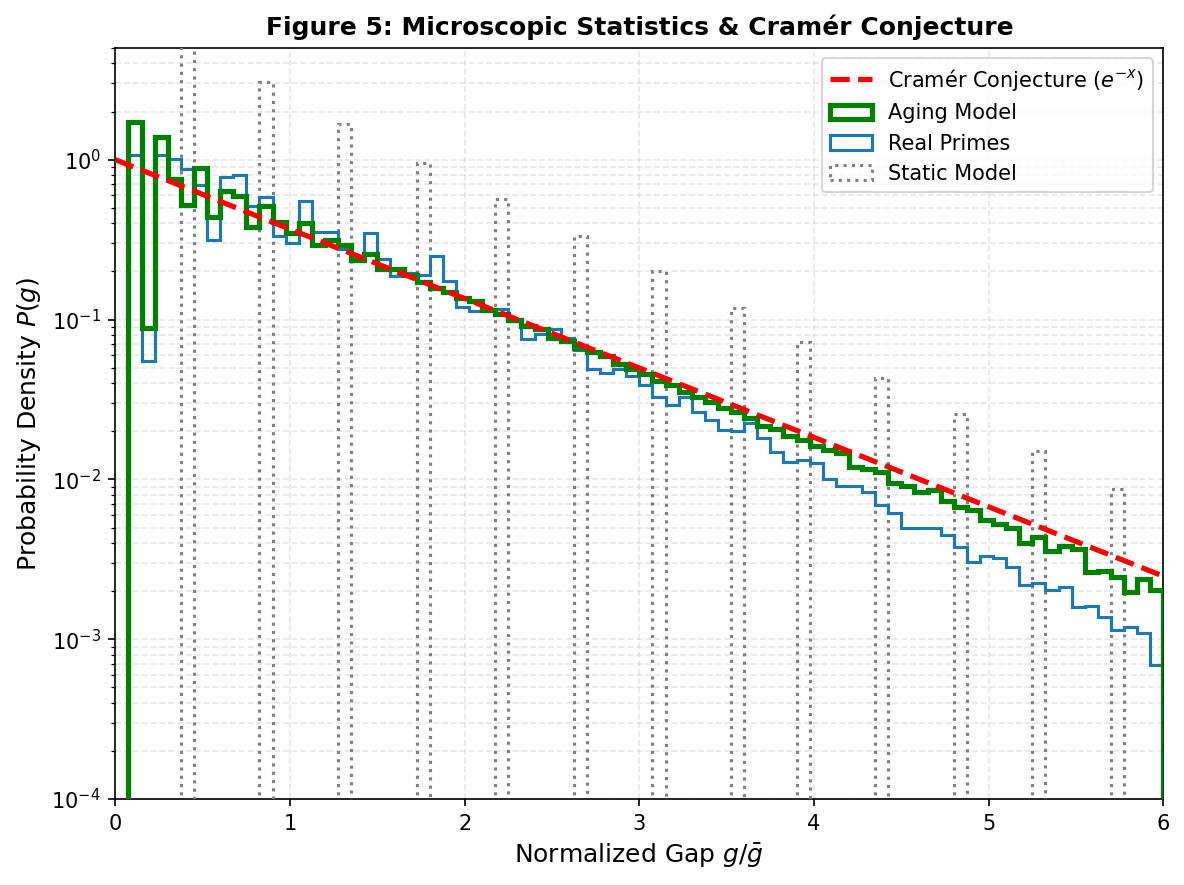

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_figure5_distribution(limit=20000000): # 2000万数据
    print(f"1. [真实素数] 生成并归一化 (N={limit})...")
    is_prime = np.ones(limit + 1, dtype=bool)
    is_prime[0:2] = False
    for i in range(2, int(limit**0.5) + 1):
        if is_prime[i]:
            is_prime[i*i : limit+1 : i] = False
    primes = np.nonzero(is_prime)[0]
    real_gaps = np.diff(primes)
    
    # 归一化: g / <g> (使用滑动窗口计算局部均值)
    # 窗口取 2000，保证平滑
    window = 2000
    smooth_real = np.convolve(real_gaps, np.ones(window)/window, mode='same')
    smooth_real[smooth_real == 0] = 1 
    norm_real = real_gaps / smooth_real

    print(f"2. [静态模型] 生成对照数据...")
    u = 1.543689012692076
    x = 0.1
    static_gaps = []
    # 静态模型只需要生成一部分数据(500万)就足够看清分布了
    static_limit = min(limit, 5000000) 
    
    last_t = 0
    for t in range(1, static_limit):
        x = 1 - u * x**2
        if x < 0:
            gap = t - last_t
            if gap > 0: static_gaps.append(gap)
            last_t = t
    static_gaps = np.array(static_gaps)
    # 静态模型是平稳过程，直接除以全局均值
    norm_static = static_gaps / np.mean(static_gaps)

    print(f"3. [老化模型] 生成模型数据...")
    # 这里用 k=4.5 或 12.74 对归一化分布影响不大，为了和 Fig 4 保持一致，可以用 4.5
    # 但为了统计严谨，用物理真值 12.74 也是完美的
    k = 12.74 
    aging_gaps = []
    x = 0.1
    last_t = 0
    
    for t in range(1, limit):
        x = 1 - u * x**2
        if x < 0:
            prob = k / np.log(t + 2)
            if np.random.random() < prob:
                gap = t - last_t
                if gap > 0: aging_gaps.append(gap)
                last_t = t
    
    aging_gaps = np.array(aging_gaps)
    # 老化模型归一化
    smooth_aging = np.convolve(aging_gaps.astype(float), np.ones(window)/window, mode='same')
    smooth_aging[smooth_aging == 0] = 1
    norm_aging = aging_gaps / smooth_aging

    # ==========================================
    # 4. 绘图
    # ==========================================
    print("4. 开始绘图 (Figure 5)...")
    plt.figure(figsize=(8, 6), dpi=150)
    
    # --- 1. 理论曲线 (红色虚线) ---
    xx = np.linspace(0, 6, 100)
    plt.plot(xx, np.exp(-xx), 'r--', lw=2.5, label='Cramér Conjecture ($e^{-x}$)', zorder=10)
    
    # --- 2. 老化模型 (绿色实线 - 重点) ---
    plt.hist(norm_aging, bins=80, density=True, range=(0, 6), 
             histtype='step', lw=2.5, color='#008000', label='Aging Model', zorder=5)
    
    # --- 3. 真实素数 (蓝色实线 - 目标) ---
    plt.hist(norm_real, bins=80, density=True, range=(0, 6), 
             histtype='step', lw=1.5, color='#1f77b4', label='Real Primes', zorder=4)

    # --- 4. 静态模型 (灰色点线 - 对照) ---
    # 静态模型的分布通常会有很多"毛刺"或者尾部不对
    plt.hist(norm_static, bins=80, density=True, range=(0, 6), 
             histtype='step', lw=1.5, color='gray', linestyle=':', label='Static Model', zorder=3)

    # 设置坐标轴
    plt.yscale('log') # 对数纵坐标，这是验证指数分布的标准做法
    plt.xlabel('Normalized Gap $g / \\bar{g}$', fontsize=12)
    plt.ylabel('Probability Density $P(g)$', fontsize=12)
    plt.title('Figure 5: Microscopic Statistics & Cramér Conjecture', fontsize=12, fontweight='bold')
    
    plt.legend(fontsize=10, loc='upper right')
    plt.grid(True, which='both', ls='--', alpha=0.3)
    plt.ylim(1e-4, 5) # 设置合适的 Y 轴范围
    plt.xlim(0, 6)    # 设置 X 轴范围
    
    plt.tight_layout()
    plt.show()

# 运行代码
plot_figure5_distribution(limit=20000000)